In [1]:
import csv
import pandas as pd
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from fitted2curve import FittedDataToCurve


In [2]:

csv_path = r"C:\Users\mktha\Documents\projects\felix\data\RawDataMag(olddataset).csv"

df_mag = pd.read_csv(csv_path, header=0, index_col=0)

df_mag.head()

,s1,s2,s3,4,4.003,4.006,4.009,4.012,4.015,4.018,...,6.973,6.976,6.979,6.982,6.985,6.988,6.991,6.994,6.997,7
sample n.,,,,,,,,,,,,,,,,,,,,,
1,0,2.266667,20.0,0.000636,0.000638,0.000640,0.000641,0.000643,0.000644,0.000646,...,0.000652,0.000649,0.000646,0.000643,0.000640,0.000637,0.000634,0.000631,0.000628,0.000625
2,0,4.233333,20.0,0.000103,0.000102,0.000100,0.000098,0.000096,0.000094,0.000092,...,0.000187,0.000187,0.000186,0.000185,0.000185,0.000184,0.000183,0.000183,0.000182,0.000181
3,0,6.200000,20.0,0.000563,0.000562,0.000562,0.000561,0.000561,0.000560,0.000560,...,0.000029,0.000028,0.000028,0.000027,0.000027,0.000026,0.000026,0.000025,0.000025,0.000024
4,0,8.166667,20.0,0.000629,0.000628,0.000628,0.000627,0.000627,0.000626,0.000626,...,0.000150,0.000149,0.000148,0.000146,0.000145,0.000144,0.000143,0.000142,0.000140,0.000139
5,0,10.133333,20.0,0.000331,0.000330,0.000330,0.000329,0.000329,0.000328,0.000328,...,0.000028,0.000027,0.000026,0.000025,0.000025,0.000024,0.000023,0.000022,0.000021,0.000020


In [17]:
csv_path = r"C:\Users\mktha\Documents\projects\felix\data\FittedData(olddataset).csv"

df_fitted = pd.read_csv(csv_path, header=0, index_col=0)

# # replace NaN with -1
# df_fitted = df_fitted.fillna(-1)

df_fitted.describe()

,s1,s2,s3,n. of res,a,amp1,phase1,freq1,lwidth1,coeff1,...,phase3,freq3,lwidth3,coeff3,amp4,phase4,freq4,lwidth4,coeff4,error(mse)
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,...,522.000000,522.000000,522.000000,522.000000,14.000000,14.000000,14.000000,14.000000,14.000000,904.000000
mean,45.045045,9.158859,23.853854,2.518519,-0.010887,0.453469,106.618707,4.689396,0.029931,3.284510e+03,...,-95.960975,6.122851,0.004886,-30.871144,0.118769,-87.638662,6.219143,0.056583,10960.586193,0.001373
std,28.716236,5.647526,2.456834,0.560389,0.045186,0.164336,85.267165,0.196614,0.028296,6.231427e+04,...,47.904355,0.132456,0.004699,511.837858,0.142823,23.331611,0.087349,0.029615,41009.756140,0.002323
min,0.000000,0.300000,20.000000,1.000000,-0.148016,0.023417,-178.133986,4.039000,0.000673,-3.914313e+05,...,-177.051424,4.660000,0.000690,-11212.697400,0.030373,-149.150997,5.995000,0.002558,-0.042453,0.000004
25%,20.000000,4.233333,21.711111,2.000000,-0.028678,0.436982,103.944577,4.652500,0.002859,-4.269107e-03,...,-117.559496,6.061000,0.001699,-0.003150,0.045244,-83.131575,6.159250,0.048564,-0.004223,0.000148
50%,50.000000,10.133333,24.277778,3.000000,-0.005882,0.492247,141.331470,4.663000,0.023019,-1.612314e-03,...,-98.866077,6.142000,0.004025,-0.000984,0.049485,-81.815759,6.263500,0.066983,0.030925,0.000453
75%,70.000000,14.066667,25.988889,3.000000,0.009273,0.497136,148.194167,4.712500,0.049232,-1.405000e-05,...,-84.710021,6.211000,0.006875,0.000297,0.061684,-73.079211,6.278500,0.075989,0.122744,0.001488
max,90.000000,18.000000,27.700000,4.000000,0.140717,0.992510,179.709683,6.241000,0.157997,1.211050e+06,...,172.436333,6.313000,0.065807,0.210107,0.405120,-66.377301,6.286000,0.088875,153444.724800,0.024573


[0.003862   0.00381864 0.00377491 ... 0.01696062 0.01695662 0.01695264]


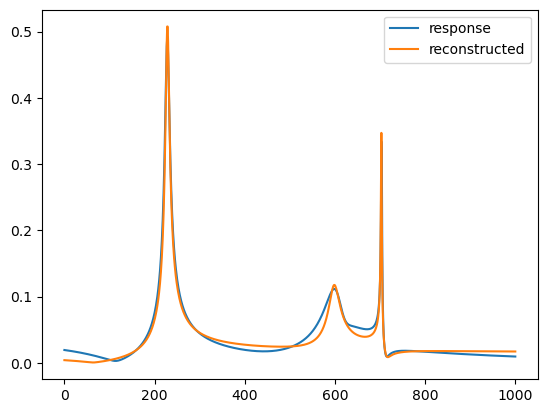

[0.02722415 0.02768174 0.02814519 ... 0.05674238 0.05672254 0.05670276]


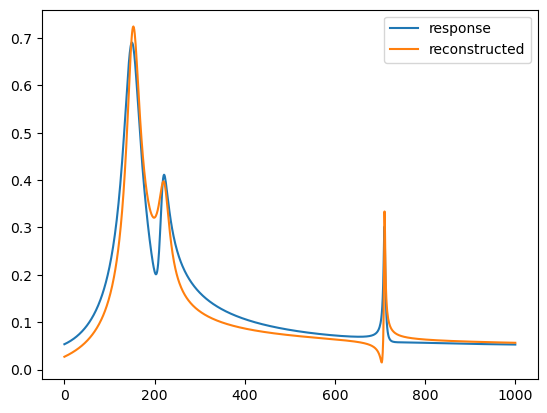

[0.08624022 0.08651043 0.08678283 ... 0.03890348 0.03886331 0.03882331]


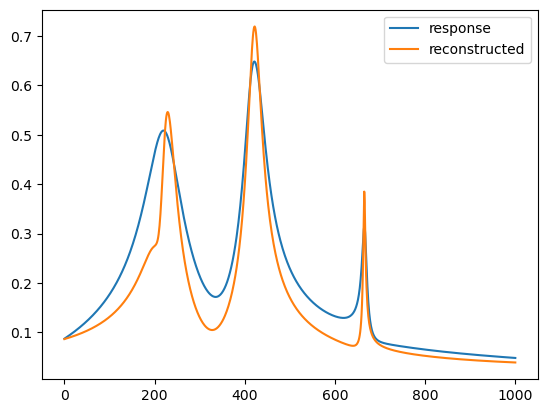

[0.02011505 0.02025961 0.02040548 ... 0.0223967  0.02237886 0.0223611 ]


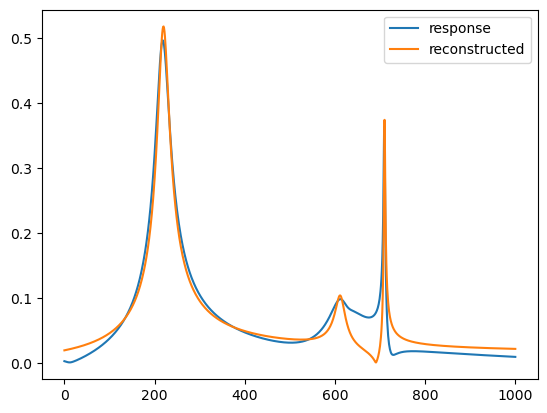

[0.00277296 0.0027728  0.00277264 ... 0.00313    0.00312895 0.0031279 ]


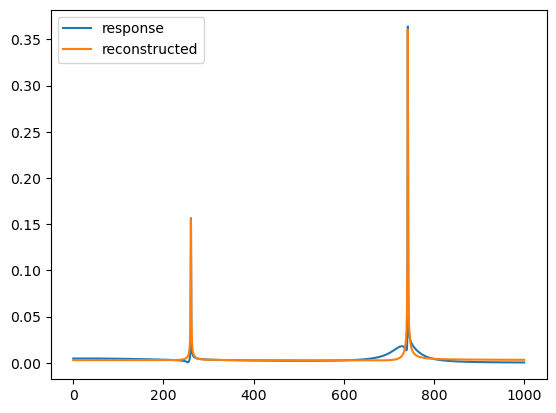

In [5]:
indices = np.random.randint(0, len(df_fitted), 5)
for index in indices:
    response = df_mag.iloc[index, 3:].values
    fitted = df_fitted.iloc[index, 3:-1].values
    reconstructed, w = FittedDataToCurve(fitted)
    print(reconstructed)
    # plot the response and the reconstructed
    plt.plot(response, label='response')
    plt.plot(reconstructed, label='reconstructed')
    plt.legend()
    plt.show()

Process Outputs

In [6]:
outputs = df_fitted.iloc[:, 3:-1]
num_res = outputs.iloc[:, 0]
# drop the first column
outputs = outputs.drop(outputs.columns[0], axis=1)
# create a new df with 4 columns named res_1, res_2, res_3, res_4
num_res_new = pd.DataFrame(columns=['res_1', 'res_2', 'res_3', 'res_4'])
# fill the first column with 1 if num_res > 0 else 0
num_res_new['res_1'] = np.where(num_res > 0, 1, 0)
# fill the second column with 1 if num_res > 1 else 0
num_res_new['res_2'] = np.where(num_res > 1, 1, 0)
# fill the third column with 1 if num_res > 2 else 0
num_res_new['res_3'] = np.where(num_res > 2, 1, 0)
# fill the fourth column with 1 if num_res > 3 else 0
num_res_new['res_4'] = np.where(num_res > 3, 1, 0)
# convert to float
num_res_new = num_res_new.astype(float)
num_res_new.head()


,res_1,res_2,res_3,res_4
0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0


In [28]:
output_a = outputs.iloc[:, 0]
output_amps = outputs.iloc[:, 1::5]
output_phases = outputs.iloc[:, 2::5]
output_freqs = outputs.iloc[:, 3::5]
output_widths = outputs.iloc[:, 4::5]
output_coeffs = outputs.iloc[:, 5::5]

# a_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

outputs_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
outputs_scaled = outputs_scaler.fit_transform(outputs)
new_df = pd.DataFrame(outputs_scaled, columns=outputs.columns)
new_df.fillna(0, inplace=True)
# concatenate the num_res df with the new_df
outputs_processed = pd.concat([num_res_new, new_df], axis=1)
# drop the index column
# outputs_processed = new_df.drop(new_df.columns[0], axis=1)
outputs_processed.head()

,res_1,res_2,res_3,res_4,a,amp1,phase1,freq1,lwidth1,coeff1,...,amp3,phase3,freq3,lwidth3,coeff3,amp4,phase4,freq4,lwidth4,coeff4
0,1.0,1.0,0.0,0.0,0.511940,0.150562,0.064553,0.359673,0.007075,0.244266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.513093,0.314439,0.737118,0.362398,0.002481,0.244266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.517105,0.038270,0.921275,0.359673,0.021382,0.244266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.515665,0.187488,0.692492,0.355586,0.007369,0.244266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.513667,0.249980,0.020861,0.359673,0.004154,0.244266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


preprocess inputs

In [20]:
inputs = df_mag.iloc[:, 0:3]
inputs_scaler = preprocessing.StandardScaler()
inputs_scaled = inputs_scaler.fit_transform(inputs)
inputs_processed = pd.DataFrame(inputs_scaled, columns=inputs.columns)
inputs_processed.head()

,s1,s2,s3
0,-1.569412,-1.221003,-1.569412
1,-1.569412,-0.872593,-1.569412
2,-1.569412,-0.524184,-1.569412
3,-1.569412,-0.175774,-1.569412
4,-1.569412,0.172635,-1.569412


Define loss functions

In [21]:
def bce_loss(y_true, y_pred):
    # y is a tensor of shape (batch_size, 25)
    # dims 0-3 are 1 if the corresponding component is present, 0 otherwise
    # dim 4 is a parameter
    # dims 5-9 are the first component
    # dims 10-14 are the second component
    # dims 15-19 are the third component
    # dims 20-24 are the fourth component
    positive_map_true = y_true[:, :4]
    positive_map_pred = y_pred[:, :4]
    loss = tf.keras.losses.binary_crossentropy(positive_map_pred, positive_map_true)
    return loss

def mse_loss(y_true, y_pred):
    # y is a tensor of shape (batch_size, 24)
    # dims 0-3 are 1 if the corresponding component is present, 0 otherwise
    # dims 4-8 are the first component
    # dims 9-13 are the second component
    # dims 14-18 are the third component
    # dims 19-23 are the fourth component
    positive_map_true = y_true[:, :4]
    positive_map_pred = y_pred[:, :4]
    a_true = y_true[:, 4]
    a_pred = y_pred[:, 4]
    # get the components
    components_true = tf.reshape(y_true[:, 5:], (-1, 4, 5))
    components_pred = tf.reshape(y_pred[:, 5:], (-1, 4, 5))
    pos_map = tf.expand_dims(positive_map_true, axis=-1)
    components_true *= pos_map
    components_pred *= pos_map
    components_true = tf.reshape(components_true, (-1, 20))
    components_pred = tf.reshape(components_pred, (-1, 20))
    # add the a values to the components
    a_true = tf.expand_dims(a_true, axis=-1)
    a_pred = tf.expand_dims(a_pred, axis=-1)
    regvals_true = tf.concat([a_true, components_true], axis=-1)
    regvals_pred = tf.concat([a_pred, components_pred], axis=-1)
    # calculate the loss for the components whose corresponding positive component is 1
    loss = tf.keras.losses.mse(regvals_pred, regvals_true)
    # reduce the loss to a single value
    loss = tf.reduce_sum(loss, axis=-1)
    return loss

def loss_func(y_true, y_pred):
    return bce_loss(y_true, y_pred) + 5 * mse_loss(y_true, y_pred)

# construct test tensors to test loss function
y_true = tf.constant([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=tf.float32)
y_pred = tf.constant([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=tf.float32)
loss_func(y_true, y_pred)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.23809524, 7.927642  ], dtype=float32)>

In [29]:
inputs_arr = inputs_processed.values
outputs_arr = outputs_processed.values
# split the data into training and validation sets
inputs_train, inputs_val, outputs_train, outputs_val = train_test_split(inputs_arr, outputs_arr, test_size=0.2, random_state=42)
num_inputs = inputs_train.shape[1]
num_outputs = outputs_train.shape[1]
num_regvals = 5
num_components = 4
num_params = 1
# print shapes
print(inputs_train.shape)
print(inputs_val.shape)
print(outputs_train.shape)
print(outputs_val.shape)

# print 10 random rows from the training set
for i in range(10):
    idx = np.random.randint(0, inputs_train.shape[0])
    print(f'in: {inputs_train[idx]}')
    print(f'out: {outputs_train[idx]}')

(799, 3)
(200, 3)
(799, 25)
(200, 25)
in: [1.56627323 0.86945428 1.56627323]
out: [1.         1.         1.         0.         0.47275038 0.43628705
 0.89806267 0.27247956 0.46148827 0.24426578 0.23778454 0.72462219
 0.17321429 0.35287348 0.09304778 0.56090627 0.19112473 0.81306715
 0.18190213 0.99998108 0.         0.         0.         0.
 0.        ]
in: [ 1.21786375 -0.8725931  -1.22100257]
out: [1.         1.         0.         0.         0.49984295 0.15760841
 0.70217852 0.33514986 0.00176802 0.24426578 0.12801138 0.03828776
 0.95       0.00953665 0.09304776 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
in: [-0.17577415 -0.52418363  1.56627323]
out: [1.         1.         0.         0.         0.43675946 0.4858716
 0.88123865 0.28201635 0.58525288 0.24426577 0.45068304 0.15705482
 0.81785714 0.30211255 0.09304776 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
in: [-0.52418363 -0.52

In [30]:
dropout_rate = 0.2
hidden_dim = 512
hidden_layers = 15
input_layer = tf.keras.Input(shape=(num_inputs,))
x = layers.Dense(hidden_dim, activation='relu')(input_layer)
x = layers.LayerNormalization()(x)
x = layers.Dropout(dropout_rate)(x)
for layer in range(hidden_layers - 1):
    residual = x
    x = layers.Dense(hidden_dim, activation='relu')(x)
    x = layers.LayerNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    # x = layers.Dense(hidden_dim, activation='relu')(x)
    # x = layers.LayerNormalization()(x)
    # x = layers.Dropout(dropout_rate)(x)
    x = layers.Add()([x, residual])
reg_output = layers.Dense((num_regvals * num_components) + num_params, activation='sigmoid')(x)
obj_output = layers.Dense(num_components, activation='sigmoid')(x)
output_layer = layers.Concatenate()([obj_output, reg_output])

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss_func, metrics=[bce_loss, mse_loss])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 512)          2048        input_2[0][0]                    
__________________________________________________________________________________________________
layer_normalization_15 (LayerNo (None, 512)          1024        dense_17[0][0]                   
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 512)          0           layer_normalization_15[0][0]     
____________________________________________________________________________________________

Training

Epoch 1/300
100/100 [==============================] - 12s 27ms/step - loss: 5.4810 - bce_loss: 1.8270 - mse_loss: 0.7305 - val_loss: 5.3415 - val_bce_loss: 1.8253 - val_mse_loss: 0.7032

Epoch 00001: val_loss improved from inf to 5.34149, saving model to ../models\best_model.h5


c:\Users\mktha\anaconda3\envs\medical_env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/300
100/100 [==============================] - 2s 18ms/step - loss: 5.2694 - bce_loss: 1.7076 - mse_loss: 0.7123 - val_loss: 5.6626 - val_bce_loss: 2.0503 - val_mse_loss: 0.7225

Epoch 00002: val_loss did not improve from 5.34149
Epoch 3/300
100/100 [==============================] - 2s 17ms/step - loss: 5.2328 - bce_loss: 1.6432 - mse_loss: 0.7180 - val_loss: 5.6589 - val_bce_loss: 2.0199 - val_mse_loss: 0.7278

Epoch 00003: val_loss did not improve from 5.34149
Epoch 4/300
100/100 [==============================] - 2s 17ms/step - loss: 5.3342 - bce_loss: 1.6973 - mse_loss: 0.7272 - val_loss: 5.3836 - val_bce_loss: 1.7806 - val_mse_loss: 0.7206

Epoch 00004: val_loss did not improve from 5.34149
Epoch 5/300
100/100 [==============================] - 2s 17ms/step - loss: 5.2538 - bce_loss: 1.5795 - mse_loss: 0.7347 - val_loss: 5.8474 - val_bce_loss: 2.0339 - val_mse_loss: 0.7627

Epoch 00005: val_loss did not improve from 5.34149
Epoch 6/300
100/100 [===========================

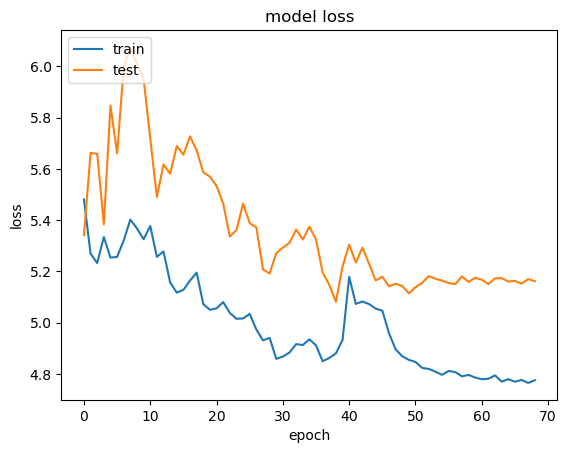

In [31]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='../models/best_model.h5', monitor='val_loss',
                                                 save_best_only=True, verbose=1)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1)
model.fit(inputs_train, outputs_train, epochs=300, batch_size=8, validation_data=(inputs_val, outputs_val),
            callbacks=[lr_callback, cp_callback, es_callback])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Testing

In [25]:
# load the best model
model = tf.keras.models.load_model('../models/best_model.h5', custom_objects={'loss_func': loss_func, 'bce_loss': bce_loss, 'mse_loss': mse_loss})
# evaluate the model on the validation set
preds = model.predict(inputs_val)

Predicted values:
[9.9997628e-01 9.9997115e-01 9.9999988e-01 3.7195110e-05]
fitted_array_pred: [ 3.00000000e+00  1.96391586e-02  3.71527433e-01 -5.85298805e+01
  5.96432686e+00  6.53383508e-03 -8.40097427e+01  4.90262926e-01
  1.62231293e+02  4.52647305e+00  3.64049487e-02  4.08244092e+03
  4.32377726e-01  1.67717163e+02  4.60686779e+00  2.22980510e-02
  1.94413789e+04  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
fitted_array_true: [ 3.00000000e+00  1.10136129e-01  4.16605804e-01  1.61310842e+02
  4.61200000e+00  2.59005780e-02  5.50085200e-03  4.72278491e-01
  1.38045604e+02  4.68100000e+00  3.22681470e-02  9.00975600e-03
  3.59127989e-01 -7.07661311e+01  5.96800000e+00  7.71264400e-03
 -2.55646100e-03  1.18769189e-01 -8.76386620e+01  6.21914286e+00
  5.65826332e-02  1.09605862e+04]


C:\Users\mktha\Documents\projects\felix\src\fitted2curve.py:29: RuntimeWarning: invalid value encountered in sqrt
  ans = (param[0]**2+2*param[0]*((b[0]*t[0]*(np.cos(p[0])*(w-w0[0])+np.sin(p[0])*(param[1]+t[0])))/((w-w0[0])**2+(param[1]+t[0])**2)+


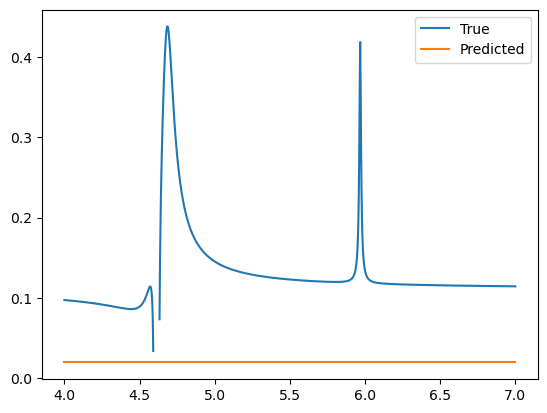

Actual values:
[1. 1. 1. 0.]

Predicted values:
[9.9996054e-01 9.9997568e-01 1.8101525e-03 4.6095643e-05]
fitted_array_pred: [ 2.00000000e+00 -4.19588806e-03  2.60297835e-01 -5.89664383e+01
  6.14906931e+00  1.22208633e-02 -7.20454330e+01  4.81077850e-01
  1.39726837e+02  4.70600319e+00  1.45620173e-02  1.36376221e+03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00]
fitted_array_true: [ 2.00000000e+00  2.00757150e-02  4.91316890e-01  1.51841399e+02
  4.67800000e+00  1.53263800e-02  1.84939000e-04  3.34812677e-01
 -1.42079947e+02  6.18100000e+00  2.56257100e-03 -4.93504900e-03
  3.16516195e-01 -9.59609754e+01  6.12285057e+00  4.88619410e-03
 -3.08711436e+01  1.18769189e-01 -8.76386620e+01  6.21914286e+00
  5.65826332e-02  1.09605862e+04]


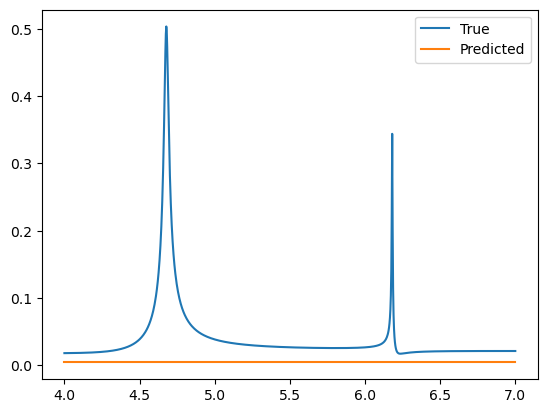

Actual values:
[1. 1. 0. 0.]

Predicted values:
[9.9998784e-01 9.9998200e-01 1.0000000e+00 2.3502405e-05]
fitted_array_pred: [ 3.00000000e+00  5.39807836e-03  3.82569700e-01 -1.11411690e+02
  6.09939909e+00  5.10132965e-03  2.11177039e+00  3.00604284e-01
  3.14897022e+01  5.60731077e+00  4.88098972e-02  1.68360083e+03
  4.90697801e-01  1.39686981e+02  4.68093920e+00  5.21984659e-02
 -6.36911035e+03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
fitted_array_true: [ 3.00000000e+00 -2.78108940e-02  4.95630562e-01  1.42236462e+02
  4.66300000e+00  5.27297310e-02 -4.24649000e-04  3.41059869e-01
  2.24330056e+01  5.58400000e+00  4.88366260e-02 -1.88455500e-03
  3.68716400e-01 -1.07441490e+02  6.10000000e+00  6.86468100e-03
  1.22352900e-03  1.18769189e-01 -8.76386620e+01  6.21914286e+00
  5.65826332e-02  1.09605862e+04]


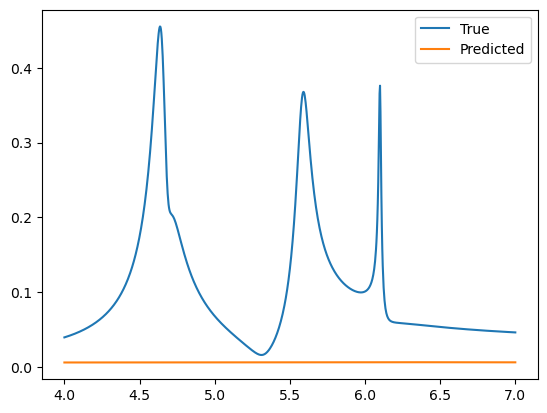

Actual values:
[1. 1. 1. 0.]

Predicted values:
[9.9993920e-01 9.9995112e-01 7.9022739e-06 6.6244036e-05]
fitted_array_pred: [ 2.00000000e+00  3.19093512e-03  2.21707270e-01  2.02833385e+01
  6.17485571e+00 -4.26952122e-03 -7.14992428e+00  2.94590294e-01
  7.68124533e+00  4.85490179e+00 -5.18504856e-03  3.64754053e+03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
fitted_array_true: [ 2.00000000e+00 -1.50304500e-03  1.61218869e-01  6.18840097e+01
  4.84600000e+00  2.21139300e-03 -4.36194600e-03  2.23746234e-01
  9.23935387e+01  6.22900000e+00  1.41672300e-03 -2.82674500e-03
  3.16516195e-01 -9.59609754e+01  6.12285057e+00  4.88619410e-03
 -3.08711436e+01  1.18769189e-01 -8.76386620e+01  6.21914286e+00
  5.65826332e-02  1.09605862e+04]


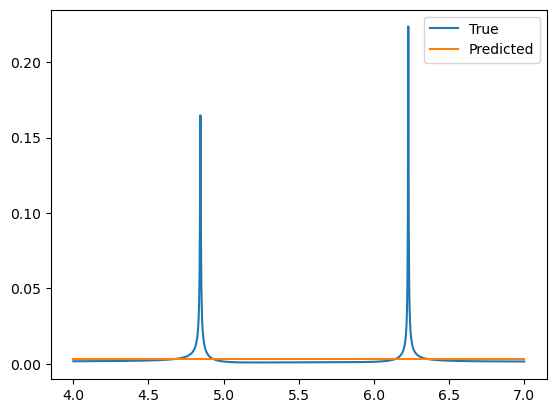

Actual values:
[1. 1. 0. 0.]

Predicted values:
[9.9995172e-01 9.9996328e-01 3.1469820e-06 3.9790575e-05]
fitted_array_pred: [ 2.00000000e+00 -3.18074599e-03  2.17977002e-01  2.95850143e+01
  6.19611216e+00 -5.21082012e-03 -1.39645581e+03  3.09820622e-01
  4.71443024e+01  4.82418489e+00  1.13390433e-03  5.89970947e+03
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
fitted_array_true: [ 2.00000000e+00 -5.09335600e-03  2.80875211e-01 -1.72842733e+02
  4.83400000e+00  1.13646600e-03 -2.28091900e-03  2.12411679e-01
  1.48181287e+02  6.22900000e+00  1.21099200e-03 -2.40431900e-03
  3.16516195e-01 -9.59609754e+01  6.12285057e+00  4.88619410e-03
 -3.08711436e+01  1.18769189e-01 -8.76386620e+01  6.21914286e+00
  5.65826332e-02  1.09605862e+04]


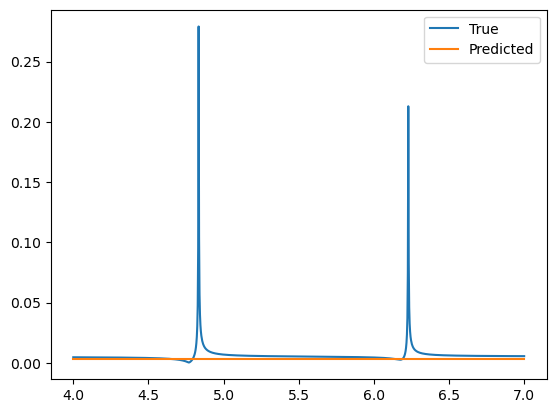

Actual values:
[1. 1. 0. 0.]

Predicted values:
[9.9997723e-01 9.9997437e-01 9.9987566e-01 4.9626575e-05]
fitted_array_pred: [ 3.00000000e+00 -1.48062008e-02  3.80588651e-01 -1.47105789e+01
  5.84768343e+00  4.68378142e-03 -7.18058777e+01  3.40896815e-01
  4.33318558e+01  5.17005634e+00  3.90875945e-03 -4.50292090e+03
  2.93545634e-01 -4.06451340e+01  4.66960049e+00  6.72519067e-03
  5.42851074e+03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
fitted_array_true: [ 3.00000000e+00 -1.59876600e-03  1.32917832e-01 -9.02109709e+01
  4.64800000e+00  1.08528600e-03 -1.12150000e-04  4.79590530e-01
  1.41193874e+02  4.74400000e+00  3.57480900e-03 -7.02965200e-03
  4.25317853e-01 -1.40970657e+02  6.26500000e+00  1.26454000e-03
 -2.52770300e-03  1.18769189e-01 -8.76386620e+01  6.21914286e+00
  5.65826332e-02  1.09605862e+04]


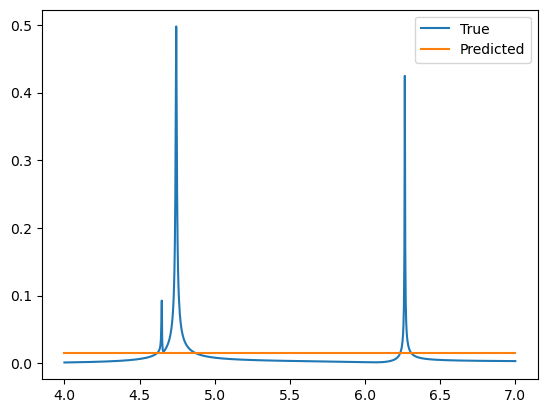

Actual values:
[1. 1. 1. 0.]

Predicted values:
[9.9999046e-01 9.9998343e-01 1.0000000e+00 1.7535087e-05]
fitted_array_pred: [ 3.00000000e+00 -6.93962537e-03  3.35111111e-01 -1.03320198e+02
  6.18839312e+00  2.54832301e-03 -6.37797852e+01  6.54430568e-01
  5.80291748e+01  5.18423367e+00  5.80624565e-02  4.82515350e+02
  4.82957214e-01  1.33482666e+02  4.72432995e+00  5.72988996e-03
  1.70314624e+03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
fitted_array_true: [ 3.00000000e+00  3.09187360e-02  5.07606420e-01  1.55904196e+02
  4.69900000e+00  6.60692000e-03 -2.72090000e-04  6.59586942e-01
  4.95328908e+01  5.25100000e+00  5.37423150e-02 -4.51742900e-03
  3.82997733e-01 -1.24046610e+02  6.21400000e+00  1.65511500e-03
 -3.04804500e-03  1.18769189e-01 -8.76386620e+01  6.21914286e+00
  5.65826332e-02  1.09605862e+04]


C:\Users\mktha\Documents\projects\felix\src\fitted2curve.py:29: RuntimeWarning: invalid value encountered in sqrt
  ans = (param[0]**2+2*param[0]*((b[0]*t[0]*(np.cos(p[0])*(w-w0[0])+np.sin(p[0])*(param[1]+t[0])))/((w-w0[0])**2+(param[1]+t[0])**2)+


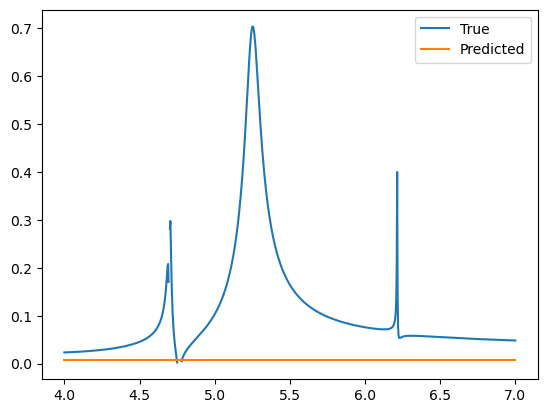

Actual values:
[1. 1. 1. 0.]

Predicted values:
[9.9999487e-01 9.9999249e-01 9.3085133e-03 7.1836985e-06]
fitted_array_pred: [ 2.00000000e+00 -2.13766936e-02  3.85367602e-01 -7.72665548e+00
  5.55448723e+00  3.82500663e-02 -8.37284766e+03  5.50681412e-01
  1.16542259e+02  4.49125004e+00  5.87553829e-02  1.91573083e+03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
fitted_array_true: [ 3.00000000e+00  9.46637320e-02  8.22793821e-01  1.06035588e+02
  4.06000000e+00  2.13873690e-02 -3.63018900e-03  4.73567917e-01
  1.14323423e+02  4.68100000e+00  8.05788360e-02  2.18004520e-02
  3.42681917e-01 -8.04577755e+01  5.94400000e+00  1.11725990e-02
  5.78159600e-03  1.18769189e-01 -8.76386620e+01  6.21914286e+00
  5.65826332e-02  1.09605862e+04]


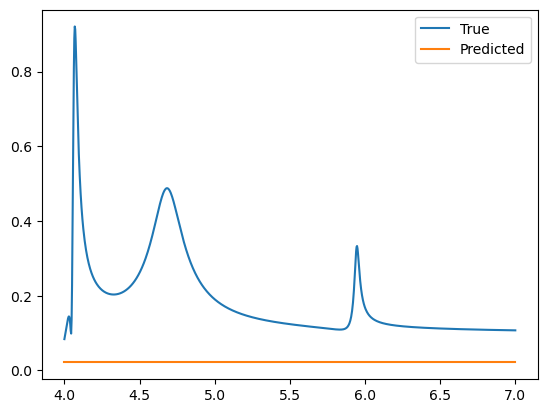

Actual values:
[1. 1. 1. 0.]

Predicted values:
[9.9998653e-01 9.9998069e-01 7.9567587e-07 2.3405333e-05]
fitted_array_pred: [ 2.00000000e+00 -1.28884835e-03  4.81107742e-01 -8.65888977e+01
  5.84522390e+00  2.35839710e-02  4.65233856e+02  4.92486060e-01
  1.30787323e+02  4.64679193e+00  6.72030151e-02 -9.44272070e+03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
fitted_array_true: [ 2.00000000e+00 -7.28640000e-04  4.95739838e-01  1.38003304e+02
  4.65700000e+00  6.88557840e-02 -4.41173000e-03  4.53474481e-01
 -9.66677621e+01  6.03400000e+00  1.67699060e-02 -1.86882400e-03
  3.16516195e-01 -9.59609754e+01  6.12285057e+00  4.88619410e-03
 -3.08711436e+01  1.18769189e-01 -8.76386620e+01  6.21914286e+00
  5.65826332e-02  1.09605862e+04]


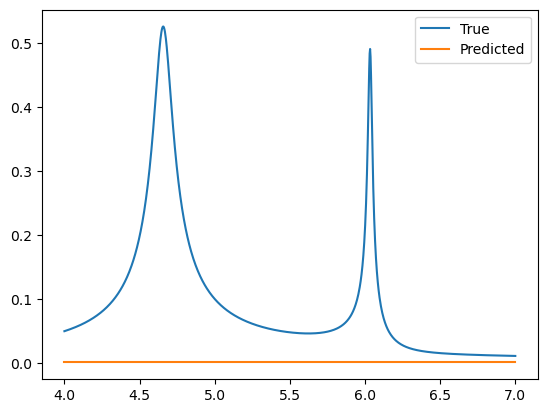

Actual values:
[1. 1. 0. 0.]

Predicted values:
[9.9997413e-01 9.9996316e-01 8.5848369e-06 4.9078430e-05]
fitted_array_pred: [ 2.00000000e+00 -7.38187111e-04  4.63391364e-01 -7.96121597e+01
  5.77411366e+00  2.81230994e-02 -1.62633716e+03  4.93691534e-01
  1.28380157e+02  4.65019703e+00  7.90352747e-02 -1.10514502e+04
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
fitted_array_true: [ 2.00000000e+00 -2.27160130e-02  4.92863995e-01  1.37154511e+02
  4.66000000e+00  9.31550410e-02 -7.37125000e-04  4.37005956e-01
 -8.72214763e+01  6.00400000e+00  2.16635320e-02 -2.77164001e-04
  3.16516195e-01 -9.59609754e+01  6.12285057e+00  4.88619410e-03
 -3.08711436e+01  1.18769189e-01 -8.76386620e+01  6.21914286e+00
  5.65826332e-02  1.09605862e+04]


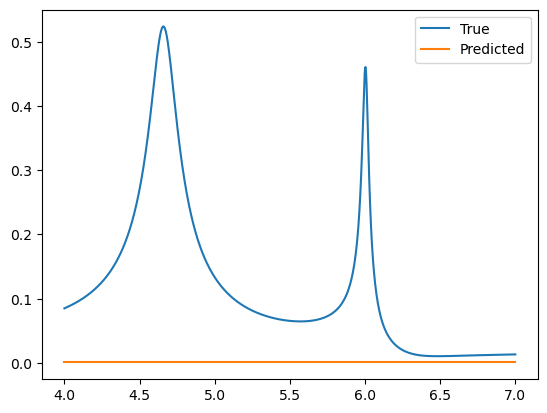

Actual values:
[1. 1. 0. 0.]



In [27]:
obj_preds = preds[:, :num_components]
reg_preds = preds[:, num_components:]
# detransform the data
reg_preds_original = outputs_scaler.inverse_transform(reg_preds)
a_preds_original = reg_preds_original[:, 0]
components_preds_original = reg_preds_original[:, 1:]
components_pred_original = components_preds_original.reshape(-1, num_components, num_regvals)
obj_preds_original = obj_preds
# get the original outputs
obj_true = outputs_val[:, :num_components]
reg_true = outputs_val[:, num_components:]
reg_true_original = outputs_scaler.inverse_transform(reg_true)
a_true_original = reg_true_original[:, 0]
components_true_original = reg_true_original[:, 1:]
components_true_original = components_true_original.reshape(-1, num_components, num_regvals)
obj_true_original = obj_true
# compare the predictions to the actual values for the validation set
for _ in range(10):
    # get a random index
    i = np.random.randint(0, inputs_val.shape[0])
    print('Predicted values:')
    print(obj_preds_original[i])
    num_res_true = np.sum(obj_true_original[i])
    # threshold the predicted values
    obj_preds_thresholded = np.zeros(num_components)
    for j in range(num_components):
        if obj_preds_original[i][j] >= 0.5:
            obj_preds_thresholded[j] = 1
    # zero out the components that are not present
    components_pred_original = components_preds_original[i].reshape(num_components, num_regvals)    
    components_pred_original = components_pred_original * obj_preds_thresholded.reshape(num_components, 1)
    # sort obj_preds_thresholded in descending order and get the indices
    obj_preds_sorted = np.sort(obj_preds_thresholded)[::-1]
    obj_preds_indices = np.argsort(obj_preds_thresholded)[::-1]
    # sort the components_pred_original in descending order
    components_pred_original = components_pred_original[obj_preds_indices]
    reg_preds_original = components_pred_original.reshape(num_components * num_regvals)
    # concat a_pred_original[i] and reg_preds_original
    reg_preds_original = np.concatenate((np.array([a_preds_original[i]]), reg_preds_original))
    num_res_pred = np.sum(obj_preds_thresholded)
    # concatenate num_res_pred and reg_preds_original[i]
    reg_preds_original[2] = reg_preds_original[2]
    fitted_array_pred = np.concatenate((np.array([num_res_pred]), reg_preds_original))
    # concatenate num_res_true and reg_true_original[i]
    fitted_array_true = np.concatenate((np.array([num_res_true]), reg_true_original[i]))
    response_true, w = FittedDataToCurve(fitted_array_true)
    response_pred, w = FittedDataToCurve(fitted_array_pred)
    print(f'fitted_array_pred: {fitted_array_pred}')
    print(f'fitted_array_true: {fitted_array_true}')
    plt.plot(w, response_true, label='True')
    plt.plot(w, response_pred, label='Predicted')
    plt.legend()
    plt.show()

    print('Actual values:')
    print(obj_true_original[i])
    # print(reg_true_original[i])
    print('')

